In [1]:
import torch
import matplotlib.pyplot as plt
import sympy as sp

from layers import LinearLayer, SymbolicLayer

$p(x) = 1 - 2x^2$

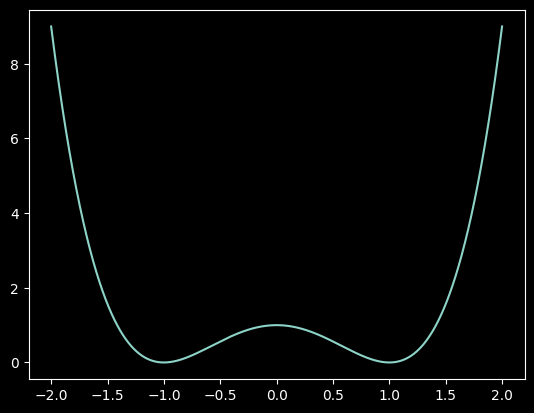

In [2]:
x = torch.linspace(-2,2,10000).reshape((-1,1))
def f(x): return 1 - 2 * x ** 2 + x ** 4
y = f(x)
plt.plot(x, y);

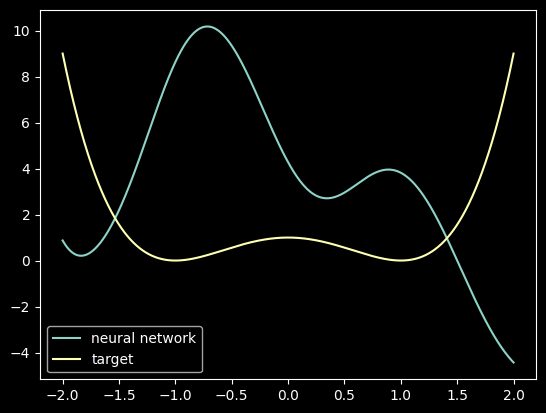

In [9]:
layers = [LinearLayer(1, 6), SymbolicLayer(), LinearLayer(5, 6),
          SymbolicLayer(), LinearLayer(5, 1)]
y_hat = x.clone()
for layer in layers:
    y_hat = layer.forward(y_hat)
plt.plot(x, y_hat, label='neural network')
plt.plot(x, y, label='target')
plt.legend();

In [4]:
for layer in layers:
    for p in layer.parameters():
        print(p.shape)

torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([5, 6])
torch.Size([1, 6])
torch.Size([5, 1])
torch.Size([1, 1])


In [27]:
regularization = 0.0
for layer in layers:
    for p in layer.parameters():
        p.requires_grad = True


learning_rate = 0.01
batch_size = 64
for _ in range(100):
    for layer in layers:
        for p in layer.parameters():
            with torch.no_grad():
                p[p.abs() < 0.01] = 0.0
    ix = torch.randint(0, len(x), (batch_size,))
    x_batch = x[ix]
    y_batch = y[ix]
    with torch.no_grad():
        y_hat = x_batch.clone()
    for layer in layers:
        y_hat = layer.forward(y_hat)

    loss = ((y_hat - y_batch) ** 2).mean(0) + regularization * \
        sum([p.abs().sum() for layer in layers for p in layer.parameters()])
    for layer in layers:
        for p in layer.parameters():
            p.grad = None
    loss.backward()
    for layer in layers:
        for p in layer.parameters():
            with torch.no_grad():
                p += -learning_rate * p.grad
    print(loss)


tensor([0.0308], grad_fn=<AddBackward0>)
tensor([0.0318], grad_fn=<AddBackward0>)
tensor([0.0360], grad_fn=<AddBackward0>)
tensor([0.0400], grad_fn=<AddBackward0>)
tensor([0.0769], grad_fn=<AddBackward0>)
tensor([0.0583], grad_fn=<AddBackward0>)
tensor([0.0487], grad_fn=<AddBackward0>)
tensor([0.0506], grad_fn=<AddBackward0>)
tensor([0.0681], grad_fn=<AddBackward0>)
tensor([0.0623], grad_fn=<AddBackward0>)
tensor([0.0830], grad_fn=<AddBackward0>)
tensor([0.0513], grad_fn=<AddBackward0>)
tensor([0.0737], grad_fn=<AddBackward0>)
tensor([0.0622], grad_fn=<AddBackward0>)
tensor([0.1023], grad_fn=<AddBackward0>)
tensor([0.1198], grad_fn=<AddBackward0>)
tensor([0.2282], grad_fn=<AddBackward0>)
tensor([0.1221], grad_fn=<AddBackward0>)
tensor([0.0445], grad_fn=<AddBackward0>)
tensor([0.0368], grad_fn=<AddBackward0>)
tensor([0.0474], grad_fn=<AddBackward0>)
tensor([0.1138], grad_fn=<AddBackward0>)
tensor([0.3465], grad_fn=<AddBackward0>)
tensor([0.7553], grad_fn=<AddBackward0>)
tensor([0.2904],

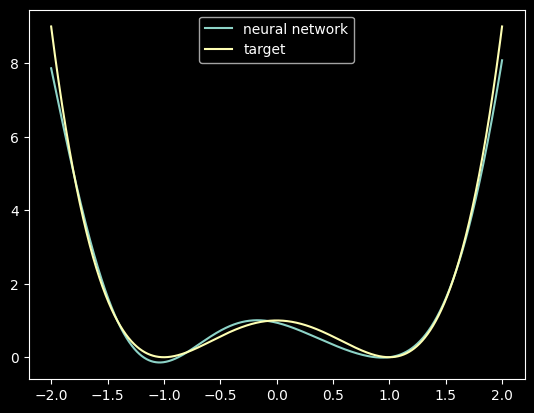

In [28]:
y_hat = x.clone()
for layer in layers:
    y_hat = layer.forward(y_hat)
plt.plot(x, y_hat.detach(), label='neural network')
plt.plot(x, y, label='target')
plt.legend();


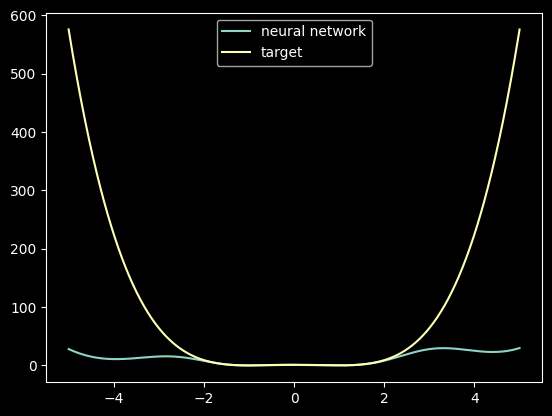

In [29]:
x2 = torch.linspace(-5,5,1000).reshape((-1, 1))
y2 = x2.clone()
for layer in layers:
    y2 = layer.forward(y2)
plt.plot(x2, y2.detach(), label='neural network')
plt.plot(x2, f(x2), label='target')
plt.legend();


In [30]:
for layer in layers:
    for p in layer.parameters():
        print(p)

tensor([[ 0.0000e+00,  0.0000e+00,  1.7454e+00,  0.0000e+00, -4.4952e-04,
         -9.7499e-01]], requires_grad=True)
tensor([[ 0.0000,  0.0000,  1.1596,  0.0000, -1.4915, -0.3439]],
       requires_grad=True)
tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.2840e+00,
         -5.8720e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  3.0671e-04,
         -6.2595e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  5.7265e-01,
         -8.9859e-01]], requires_grad=True)
tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0358, -0.0013]],
       requires_grad=True)
tensor([[ 0.0000e+00],
        [ 0.0000e+00],
        [ 6.9949e-02],
        [-8.2011e-04],
        [-1.3620e+00]], requires_grad=True)
tensor([[0.0699]], requires_grad=True)


In [33]:
for layer in layers:
    for p in layer.parameters():
        p.requires_grad = False
q = sp.Symbol('x')
for layer in layers:
    q = layer.sp_forward(q)
q

Matrix([[-1.36198*(-0.898587*(-0.974986*x - 0.343913)*(-0.000449521*x - 1.49146) - 0.587203*cos(1.74544*x + 1.15961) - 0.00156489)*(0.572649*(-0.974986*x - 0.343913)*(-0.000449521*x - 1.49146) + 1.28399*cos(1.74544*x + 1.15961) + 0.0359497) + 0.139488]])

In [46]:
q.simplify()
sp.expand(q)

Matrix([[1.34622e-7*x**4 + 0.00089342*x**3 + 0.000889442*x**2*cos(1.74544*x + 1.15961) + 1.48263*x**2 + 2.95139*x*cos(1.74544*x + 1.15961) + 1.11137*x + 1.02689*cos(1.74544*x + 1.15961)**2 + 1.07244*cos(1.74544*x + 1.15961) + 0.347151]])

In [39]:
f = sp.lambdify('x', q)


<lambdifygenerated-4>:2: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return array([[1.36198*(0.572649*(0.000449521*x + 1.49146)*(0.974986*x + 0.343913) + 1.28399*cos(1.74544*x + 1.15961) + 0.0359497)*(0.898587*(0.000449521*x + 1.49146)*(0.974986*x + 0.343913) + 0.587203*cos(1.74544*x + 1.15961) + 0.00156489) + 0.139488]])


array([[7.862531]], dtype=float32)

In [40]:
y = []
for val in x:
    y.append(f(val)[0][0])

<lambdifygenerated-4>:2: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return array([[1.36198*(0.572649*(0.000449521*x + 1.49146)*(0.974986*x + 0.343913) + 1.28399*cos(1.74544*x + 1.15961) + 0.0359497)*(0.898587*(0.000449521*x + 1.49146)*(0.974986*x + 0.343913) + 0.587203*cos(1.74544*x + 1.15961) + 0.00156489) + 0.139488]])


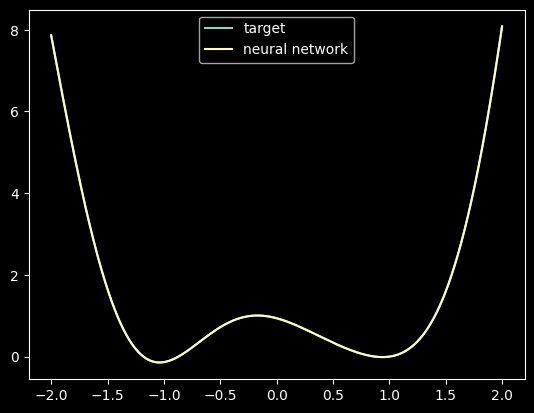

In [44]:
y_hat = x.clone()
for layer in layers:
    y_hat = layer.forward(y_hat)
plt.plot(x, y, label='target')
plt.plot(x, y_hat.detach(), label='neural network')
plt.legend();